# Gestational Age

In [ ]:
# Import libraries 
import numpy as np 
import pandas as pd 
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Import dataset 

In [ ]:
df = pd.read_csv('Ges_days.csv')  

In [ ]:
df.shape

(346, 9)

In [ ]:
df.head()

,Age,Hem,BPD,FFL,HC,AC,EFW,LMP,Ges_days
0,32,24.8,52.0,37.0,24.0,169.8,452,21,153
1,33,27.1,54.5,33.7,22.4,160.5,389,21,152
2,46,26.8,54.9,35.7,21.8,167.1,432,22,158
3,38,24.8,52.1,37.1,23.4,157.9,420,22,156
4,31,25.2,52.4,37.2,21.7,157.7,410,22,155


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       346 non-null    int64  
 1   Hem       346 non-null    float64
 2   BPD       346 non-null    float64
 3   FFL       346 non-null    float64
 4   HC        346 non-null    float64
 5   AC        346 non-null    float64
 6   EFW       346 non-null    int64  
 7   LMP       346 non-null    int64  
 8   Ges_days  346 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 24.5 KB


In [ ]:
df.isnull().sum()

Age         0
Hem         0
BPD         0
FFL         0
HC          0
AC          0
EFW         0
LMP         0
Ges_days    0
dtype: int64

In [ ]:
df

,Age,Hem,BPD,FFL,HC,AC,EFW,LMP,Ges_days
0,32,24.8,52.0,37.0,24.0,169.8,452,21,153
1,33,27.1,54.5,33.7,22.4,160.5,389,21,152
2,46,26.8,54.9,35.7,21.8,167.1,432,22,158
3,38,24.8,52.1,37.1,23.4,157.9,420,22,156
4,31,25.2,52.4,37.2,21.7,157.7,410,22,155
...,...,...,...,...,...,...,...,...,...
341,31,25.5,56.3,35.2,23.3,170.7,445,21,153
342,35,22.0,49.1,34.1,22.4,164.3,396,21,153
343,37,26.8,53.9,37.4,21.6,164.4,442,22,155
344,35,23.5,50.0,35.1,22.3,167.5,419,21,152


In [ ]:
X = df.drop(['Ges_days'],axis=1)
Y = df['Ges_days']

X

,Age,Hem,BPD,FFL,HC,AC,EFW,LMP
0,32,24.8,52.0,37.0,24.0,169.8,452,21
1,33,27.1,54.5,33.7,22.4,160.5,389,21
2,46,26.8,54.9,35.7,21.8,167.1,432,22
3,38,24.8,52.1,37.1,23.4,157.9,420,22
4,31,25.2,52.4,37.2,21.7,157.7,410,22
...,...,...,...,...,...,...,...,...
341,31,25.5,56.3,35.2,23.3,170.7,445,21
342,35,22.0,49.1,34.1,22.4,164.3,396,21
343,37,26.8,53.9,37.4,21.6,164.4,442,22
344,35,23.5,50.0,35.1,22.3,167.5,419,21


In [ ]:
Y

0      153
1      152
2      158
3      156
4      155
      ... 
341    153
342    153
343    155
344    152
345    153
Name: Ges_days, Length: 346, dtype: int64

# 80% training and 20% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=15) # 80% training and 20% test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# Decision Tree

In [ ]:
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
dt= r2_score(y_test, y_pred)
dt*100

79.1329193664507

# Linear Regression

In [ ]:
reg =  LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
lr = r2_score(y_test, y_pred)
lr*100

85.74376477988334

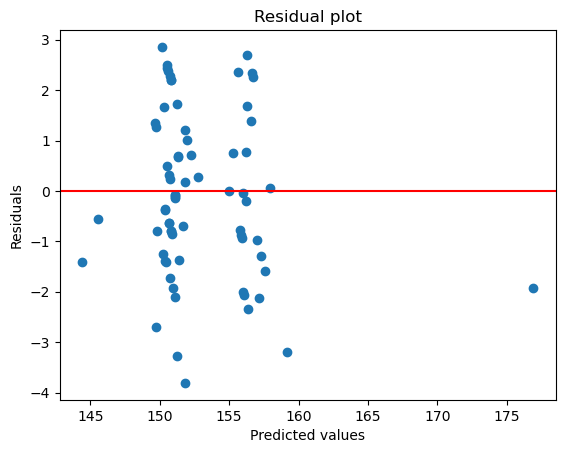

In [ ]:
import matplotlib.pyplot as plt


# calculate the residuals
residuals = y_test - y_pred

# create a scatter plot of the predicted values vs. the residuals
plt.scatter(y_pred, residuals)
plt.title("Residual plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

# print MAE
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.3226498184613311


# Random Forest reg

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
rf= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
rf* 100

87.85220932325414

# SVR

In [ ]:
from sklearn.svm import SVR
re = SVR(kernel = 'rbf')
re.fit(X_train, y_train)


SVR()

In [ ]:
y_pred = re.predict(X_test)
svr= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
svr* 100

39.34387872381683

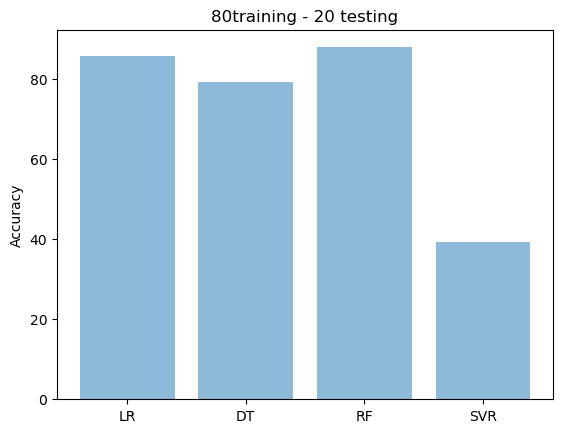

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
objects = ('LR','DT','RF','SVR')
y_pos = np.arange(len(objects))
performance = [lr*100,dt*100,rf*100,svr*100]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('80training - 20 testing')

plt.show()

# 70% training and 30% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=15) # 70% training and 30% test

# Decision Tree

In [ ]:
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dt= r2_score(y_test, y_pred)
dt*100

78.3220645806371

# Linear Regression

In [ ]:
reg =  LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
lr = r2_score(y_test, y_pred)
lr*100

88.9566746515293

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rf= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
rf* 100

90.17909858041939

In [ ]:
X_test

,Age,Hem,BPD,FFL,HC,AC,EFW,LMP
235,36,27.5,54.7,37.7,23.7,182.3,518,21
142,25,25.2,54.5,37.1,22.8,162.3,432,22
304,26,25.0,51.8,34.8,21.4,153.0,365,21
292,35,25.0,50.6,35.7,22.2,154.7,387,21
331,40,26.2,51.9,38.4,21.6,169.8,468,22
...,...,...,...,...,...,...,...,...
7,40,21.3,49.4,34.3,20.7,154.4,370,21
9,32,23.2,49.5,35.4,22.8,156.4,386,21
152,32,24.1,51.4,35.5,21.2,161.0,400,21
106,25,31.9,32.0,45.4,27.4,188.4,674,24


In [ ]:
import pandas as pd

data = [{'Age': '40', 'Hem': '21.3', 'BPD': '49.4','FFL':'34.3','HC':'20.7','AC':'154.4','EFW':'370','LMP':'21'}]
X_test = pd.DataFrame(data)
X_test

,Age,Hem,BPD,FFL,HC,AC,EFW,LMP
0,40,21.3,49.4,34.3,20.7,154.4,370,21


In [ ]:

y_pred = regressor.predict(X_test)
y_pred

array([150.2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=15) # 70% training and 30% test

# SVR

In [ ]:
from sklearn.svm import SVR
re = SVR(kernel = 'rbf')
re.fit(X_train, y_train)
y_pred = re.predict(X_test)
svr= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
svr* 100

44.377719928714065

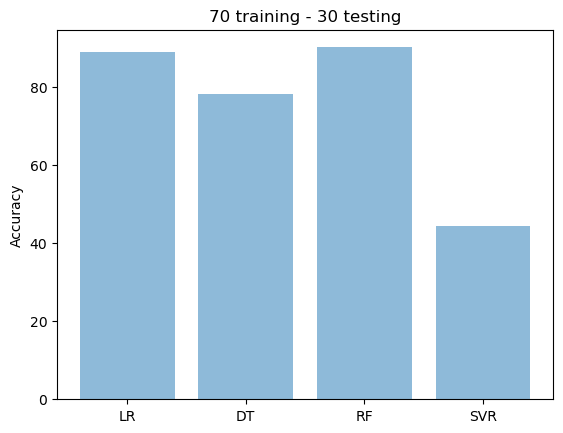

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
objects = ('LR','DT','RF','SVR')
y_pos = np.arange(len(objects))
performance = [lr*100,dt*100,rf*100,svr*100]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('70 training - 30 testing')

plt.show()

# 60% training and 40% test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4,random_state=15) # 60% training and 40% test

# DecisionTree

In [ ]:
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dt= r2_score(y_test, y_pred)
dt*100

75.82520316710887

# LinearRegression

In [ ]:
reg =  LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
lr = r2_score(y_test, y_pred)
lr*100

87.907311527593

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rf= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
rf* 100

85.31072555205049

# SVR

In [ ]:
from sklearn.svm import SVR
re = SVR(kernel = 'rbf')
re.fit(X_train, y_train)
y_pred = re.predict(X_test)
svr= r2_score(y_test, y_pred)

# Compute the percentage of variance explained by the model
svr* 100

40.521001371900546

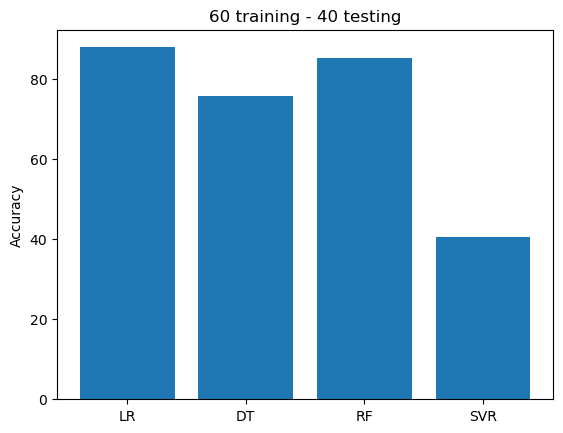

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
objects = ('LR','DT','RF','SVR')
y_pos = np.arange(len(objects))
performance = [lr*100,dt*100,rf*100,svr*100]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('60 training - 40 testing')

plt.show()